# 1. Librerías Necesarias

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, ImageColorGenerator
from matplotlib.pyplot import imread
from nltk.corpus import stopwords as sw

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_colwidth',-1)

# 2. Leer datos de texto 

In [111]:
df=pd.read_excel('Text for machine learning.xlsx',sheet_name='Prof. Gustavo')

In [112]:
df.head()

,Estrellas 1-5,Opinión
0,4,"Buen profesor, se nota que le gusta lo que hac..."
1,4,"Buen profesor, no me gusta que los temas se ve..."
2,4,"Es muy buen maestro hace la clase entretenida,..."
3,5,"El mejor profesor hasta ahora, conocimiento mu..."
4,5,el mejor profesor que me ha tocado en la carre...


In [113]:
df['sentimiento']=np.where(df['Estrellas 1-5']>3,1,0)

In [114]:
df['sentimiento'].value_counts(True)

1    0.931034
0    0.068966
Name: sentimiento, dtype: float64

# 3. Preparar Datos para scikit-learn

In [125]:
#diccionario de palabras de escape, palabras muy comunes o con trascendencia gramatical solamente
stop=sw.words('spanish')
stop.extend(['que','profesor','es','lo','un','de','la','vaya'])

In [126]:
cvect=CountVectorizer(encoding='utf8',
                      stop_words=stop,
                      strip_accents='unicode',
                      ngram_range=(1,2))
cvect.fit(df['Opinión'])
#dtmt=cvect.transform(Xt)
#dtmv=cvect.transform(Xv)
#pal_df=pd.DataFrame(dtm.toarray(),columns=cvect.get_feature_names())
#proc_freq(pal_df,pal_df.columns.tolist(),False)

/home/jose/Documentos/unam/repos/cdd_2020_1/lib64/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'ten

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [127]:
X=pd.DataFrame(cvect.transform(df['Opinión']).toarray(),columns=cvect.get_feature_names())
y=df['sentimiento']
Xt,Xv,yt,yv=train_test_split(X,y,train_size=0.7)
print (Xt.shape)
print (Xv.shape)
print (yt.shape)
print (yv.shape)

(40, 1052)
(18, 1052)
(40,)
(18,)


## 4. Seleccionar features relevantes

In [128]:
from sklearn.feature_selection import SelectKBest

In [129]:
sk = SelectKBest(k=10)
sk.fit(X,y)

SelectKBest(k=10, score_func=<function f_classif at 0x7fd498aca950>)

In [130]:
best = [a for a,b in zip(Xt.columns,sk.get_support()) if b]

In [131]:
best

['ritmo veces',
 'sabe conocimientos',
 'si asi',
 'sido',
 'sido cuenta',
 'siempre asume',
 'tema da',
 'trabajar mejor',
 'veces aprendemos',
 'veces demasiado']

# 5. Exploración mediante nube de palabras

**Nube cuadrada**

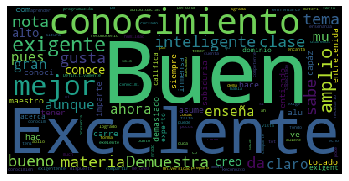

In [132]:
wordcloud = WordCloud(stopwords=stop).generate_from_text(df['Opinión'].to_string(index=False))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

**Nube anclada a una imagen**

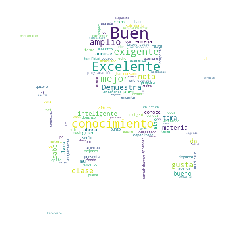

In [133]:
%matplotlib inline
imagen_act=imread('profe.jpeg')
colores_imagen = ImageColorGenerator(imagen_act)

wordcloud = WordCloud(mask=imagen_act,
                      stopwords=stop,
                      max_font_size=40,
                      background_color='white',
                     ).generate_from_text(df['Opinión'].to_string(index=False))

#plt.imshow(imagen_act)
plt.imshow(wordcloud)
#plt.imshow(wordcloud.recolor(color_func=colores_imagen))

plt.axis("off")
plt.show()

# 6. Clasificadores predictivos

In [134]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [135]:
modelo = MultinomialNB()

In [136]:
Xt.shape,yt.shape

((40, 1052), (40,))

In [137]:
modelo.fit(Xt[best],yt)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [138]:
accuracy_score(y_pred=modelo.predict(Xt[best]),y_true=yt)

0.925

In [139]:
accuracy_score(y_pred=modelo.predict(Xv[best]),y_true=yv)

0.9444444444444444

## 7. Cluster rápido

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
tfv= TfidfVectorizer(max_features=8000,
                     stop_words=stop,
                     use_idf=True,
                     #tokenizer=vocab,
                     ngram_range=(1,4))
tfvm=tfv.fit_transform(df['Opinión'])

In [168]:
from sklearn.cluster import KMeans

In [198]:
cl = KMeans(n_clusters=4)

In [199]:
cl.fit(tfvm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [200]:
df['cl'] = cl.predict(tfvm)

In [201]:
df['cl'].value_counts(True)

2    0.310345
0    0.293103
3    0.275862
1    0.120690
Name: cl, dtype: float64

0


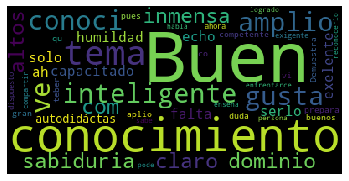

1


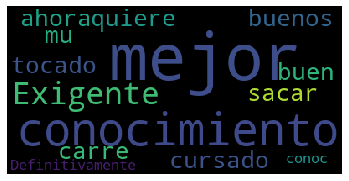

2


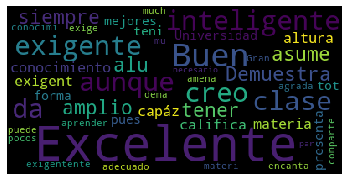

3


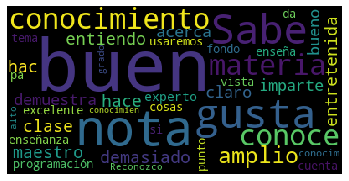

4


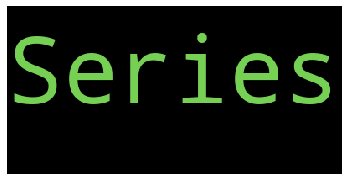

In [202]:
for k in range(5):
    print(k)
    wordcloud = WordCloud(stopwords=stop).generate_from_text(df.loc[df.cl==k]['Opinión'].to_string(index=False))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [207]:
aux = df.pivot_table(columns='cl',index='sentimiento',values='Opinión',aggfunc='count',fill_value=0)

In [208]:
for i in range(4):
    aux[i]/=aux[i].sum()

In [209]:
aux

cl,0,1,2,3
sentimiento,,,,
0,0.0,0.142857,0.055556,0.125
1,1.0,0.857143,0.944444,0.875


In [232]:
df.loc[df.cl==1].sample(1)

,Estrellas 1-5,Opinión,sentimiento,cl
37,3,"Exigente, tiene muy buenos conocimientos, nos motiva a trabajar mejor más sin embargo todo lo que e aprendido a sido por cuenta propia",0,1


In [226]:
df[['cl','sentimiento']].groupby('cl').mean()

,sentimiento
cl,
0,1.000000
1,0.857143
2,0.944444
3,0.875000
